In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Anette Hernández Monárrez, 2do Parcial

## 1. Coactivation matrix
### a.  Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

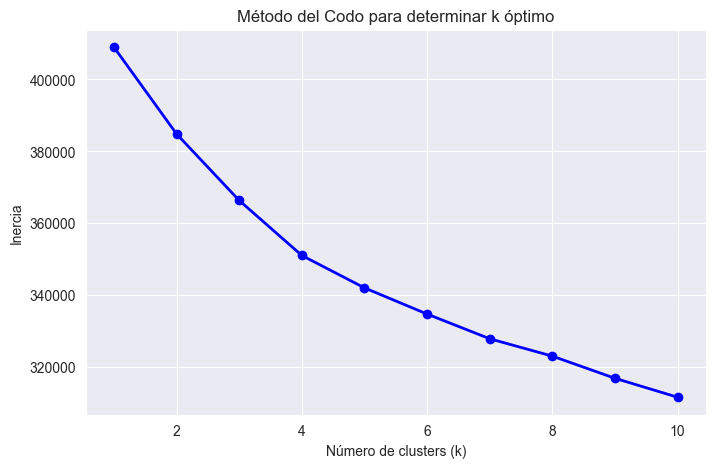

In [1]:
df = pd.read_csv('Coactivation_matrix.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


inertia = []
K = range(1, 11)

#Metodo del codo
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
#Graficar
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k óptimo')
plt.grid(True)
plt.show()


### b. Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

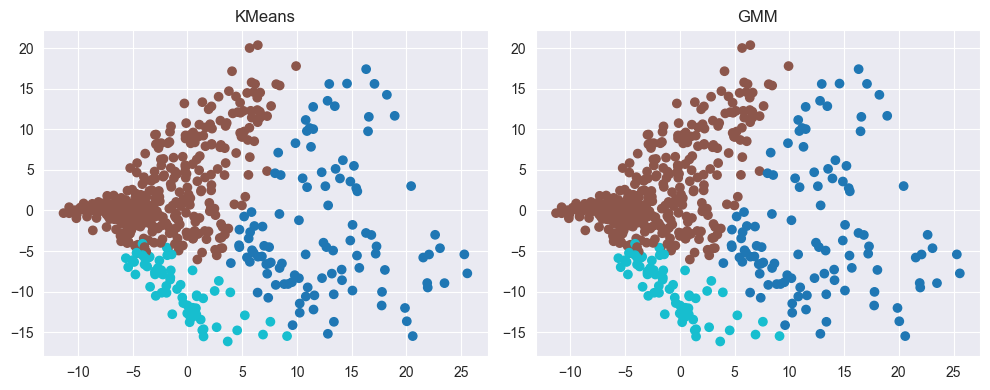

In [4]:

data = StandardScaler().fit_transform(df)

k = 3

# Clustering
df['KMeans'] = KMeans(n_clusters=k, random_state=0).fit_predict(data)
df['GMM'] = GaussianMixture(n_components=k, random_state=0).fit_predict(data)

# PCA para visualización
pca = PCA(n_components=2).fit_transform(data)
df['PCA1'], df['PCA2'] = pca[:, 0], pca[:, 1]

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, method in enumerate(['KMeans', 'GMM']):
    axes[i].scatter(df['PCA1'], df['PCA2'], c=df[method], cmap='tab10')
    axes[i].set_title(method)
plt.tight_layout()
plt.show()


## 2. Brain tumor
### A.Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

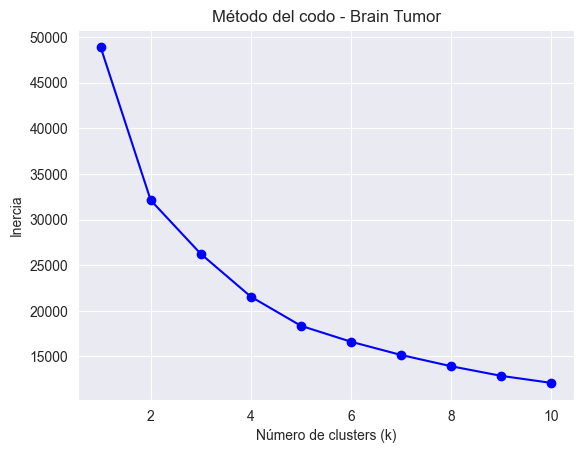

In [4]:
df2=pd.read_csv("Brain Tumor.csv")

data_numeric = df2.select_dtypes(include=['number'])
data_scaled = StandardScaler().fit_transform(data_numeric)

# Método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo - Brain Tumor')
plt.grid(True)
plt.show()


### B. Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth

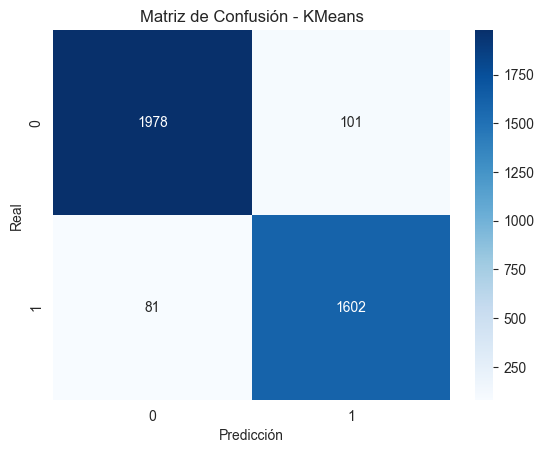

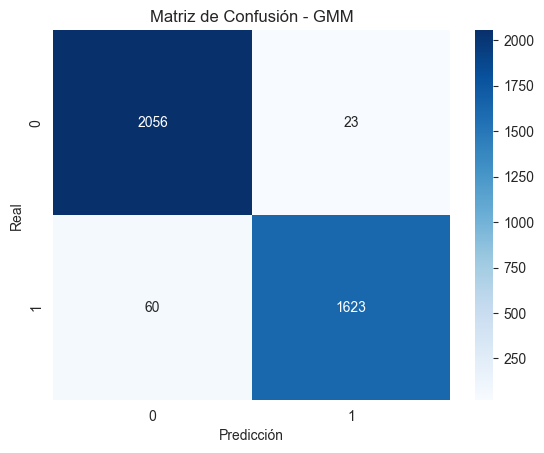

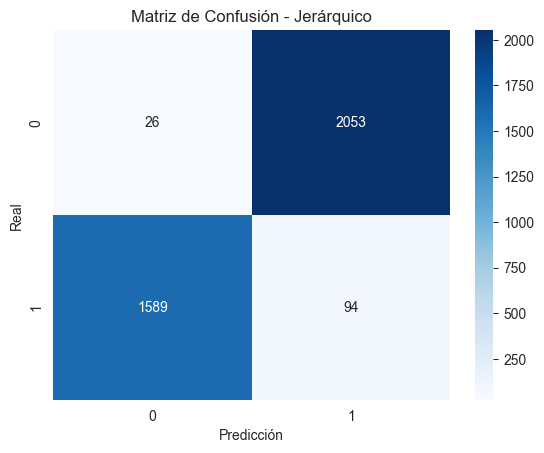

In [5]:

features = df2.select_dtypes(include=['number']).drop(columns=['Class'])
X = StandardScaler().fit_transform(features)
y_true = df2['Class']

# KMeans
kmeans_labels = KMeans(n_clusters=2, random_state=0, n_init=10).fit_predict(X)

# Gaussian Mixture
gmm_labels = GaussianMixture(n_components=2, random_state=0).fit_predict(X)

# Clustering Jerárquico
hier_labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)

# matriz de confusión
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    # Acomodar por si las etiquetas están invertidas
    cm_flip = confusion_matrix(y_true, 1 - y_pred)
    if cm_flip.max() > cm.max():
        cm = cm_flip
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

plot_confusion(y_true, kmeans_labels, 'Matriz de Confusión - KMeans')
plot_confusion(y_true, gmm_labels, 'Matriz de Confusión - GMM')
plot_confusion(y_true, hier_labels, 'Matriz de Confusión - Jerárquico')


### 3. De la previa investigación:
#### ¿qué método recomendarías para este dataset?, ¿por qué?
- Dado que los tumores cerebrales pueden presentar patrones más complejos y no lineales, el modelo GMM suele adaptarse mejor en ese tipo de casos porque permite solapamiento y variabilidad en forma y tamaño de los clusters, a comparación de K-means, que es rápido pero asume clusteres esfericos y bien seprados, y el jerarquico puede ser mas costoso computacionalmente y es menos robusto a ruido.

#### ¿qué es precision?
- Nos dice de todos los que el modelo dijo que eran positivos, ¿cuántos lo eran realmente? Una alta precisión significa pocos falsos positivos.
#### ¿qué es accuracy?
- Nos dice qué proporción de predicciones fueron correctas.
#### ¿qué es recall?
- Es la "sensibilidad" o "exhaustividad". Nos dice cuántos positivos encontró el modelo de todos los que debieron haber sido. Un alto recall significa que hubo pocos falsos negativos.
#### ¿qué es f1-score?
- Es una medida que combina la precisión y el recall, es útil cuando se busca un equilibrio entre ambos (ni muchos falsos positivos ni falsos negativos)
### 4. ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?
- Todos los valores de estas metricas salen directamente al contar los valores TP, FP, FN y TN en la matriz, quien nos da la base numerica, mientras que las metricas resumen el rendimiento del modelo desde distinas perspectivas.

### 5. A partir del resultado  2.B, calcular precision, accuracy, recall y f1-score

In [6]:
def evaluate_metrics(y_true, y_pred):
    if confusion_matrix(y_true, y_pred).trace() < confusion_matrix(y_true, 1 - y_pred).trace():
        y_pred = 1 - y_pred
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

kmeans_metrics = evaluate_metrics(y_true, kmeans_labels)
gmm_metrics = evaluate_metrics(y_true, gmm_labels)
hier_metrics = evaluate_metrics(y_true, hier_labels)

def print_metrics(name, metrics):
    print(f"=== {name} ===")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    print()

print_metrics("KMeans", kmeans_metrics)
print_metrics("Gaussian Mixture", gmm_metrics)
print_metrics("Clustering Jerárquico", hier_metrics)


=== KMeans ===
Accuracy: 0.9516
Precision: 0.9407
Recall: 0.9519
F1 Score: 0.9462

=== Gaussian Mixture ===
Accuracy: 0.9779
Precision: 0.9860
Recall: 0.9643
F1 Score: 0.9751

=== Clustering Jerárquico ===
Accuracy: 0.9681
Precision: 0.9839
Recall: 0.9441
F1 Score: 0.9636

